Name: Om Jadhav Class :TE Comp(A) Roll No: 21CO050

Assignment No 4:Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset . The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving HousingData.csv to HousingData.csv


{'HousingData.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,NA,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,NA,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,NA,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5.4

In [ ]:
df=pd.read_csv("/content/HousingData.csv")

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df.fillna(value=0, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

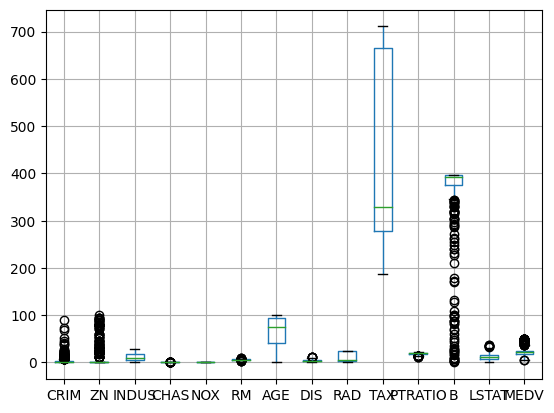

In [ ]:
df.boxplot()

In [ ]:
q1= df['MEDV'].quantile(0.25)
q3= df['MEDV'].quantile(0.75)
IQR= q3-q1
Lowerlimit=q1-1.5*IQR
Upperlimit=q3-1.5*IQR
print(f'q1 ={q1},q3={q3}, IQR={IQR},Lowerlimit={Lowerlimit},Upperlimit={Upperlimit}')

q1 =17.025,q3=25.0, IQR=7.975000000000001,Lowerlimit=5.0624999999999964,Upperlimit=13.037499999999998


In [ ]:
outliers_MEDV=[]
for i in df.MEDV:
  if i<Lowerlimit or i>Upperlimit:
    outliers_MEDV.append(i)
print("outliers are", outliers_MEDV)

outliers are [24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20.0, 16.6, 14.4, 19.4, 19.7, 20.5, 25.0, 23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16.0, 22.2, 25.0, 33.0, 23.5, 19.4, 22.0, 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20.0, 20.8, 21.2, 20.3, 28.0, 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 22.0, 22.9, 25.0, 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22.0, 20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18.0, 14.3, 19.2, 19.6, 23.0, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14.0, 14.4, 13.4, 15.6, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4, 17.0, 15.6, 13.1, 41.3, 24.3, 23.3, 27.0, 50.0, 50.0, 50.0, 22.7, 25.0, 50

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df[df.MEDV<Lowerlimit].index

Int64Index([398, 405], dtype='int64')

In [ ]:
df1=df.drop(df[df.MEDV<Lowerlimit].index & df[df.MEDV>Upperlimit].index)

<ipython-input-75-766ba247dc90>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  df1=df.drop(df[df.MEDV<Lowerlimit].index & df[df.MEDV>Upperlimit].index)


<Axes: >

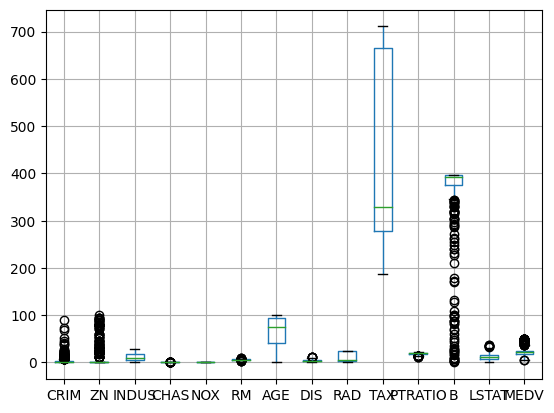

In [ ]:
df1.boxplot()

In [ ]:

x= df.drop(['MEDV'],axis=1)
y= df['MEDV']

In [ ]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
xtrain

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.00000,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,0.00,0.0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [ ]:
xtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
219,0.11425,0.0,0.00,1.0,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38


In [ ]:
ytrain

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64

In [ ]:
ytest

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [ ]:
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)


In [ ]:
model=lm.fit(xtrain, ytrain)

In [ ]:
model

LinearRegression()

In [ ]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)
ytrain_pred

array([32.46711601, 22.19020457, 27.84860446, 23.38854082,  6.48112068,
       13.23782148, 21.30687725, 29.72850097, 31.30112661, 13.31513939,
       20.38201994, 20.89291147, 13.98844795, 23.94261187,  6.76754394,
       18.39337078,  9.29215605, 45.54215284, 30.89077156, 20.84019642,
       17.79464024, 21.53212515, 22.79261415, 19.06373072, 34.61069622,
       14.27961701, 20.47374133, 35.38016748, 18.845248  , 13.98346653,
       13.64322767, 22.02478254, 15.19177708, 31.28340237, 25.07575014,
       16.78907424, 24.50012335, 10.14237389, 15.09912847, 21.59834451,
       32.50571423, 27.92363382, 26.17535003, 14.98761336, 31.69775857,
       29.6435918 , 14.23582288,  8.33367608, 27.00211104, 24.63422771,
        5.8262636 , 27.82673453, 16.63731782, 29.6720892 , 19.25637459,
       16.1508594 , 18.2181703 , 12.79325377,  9.0537286 , 18.269407  ,
       35.47872952, 32.24618169, 23.52263495, 19.94684168, 22.29626589,
       26.0307788 , 20.17883868, 17.86701428, 32.13824381, 10.57

In [ ]:
ytrain

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(ytrain, ytrain_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

The model performance for training set
--------------------------------------
MSE is 20.239635388302325




In [ ]:
mse = mean_squared_error(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n\n\n")

The model performance for testing set
--------------------------------------
MSE is 36.47801175251742






In [ ]:
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print("\n")


The model performance for training set
--------------------------------------
RMSE is 4.498848229080675




In [ ]:
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))


In [ ]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 6.039702952341068


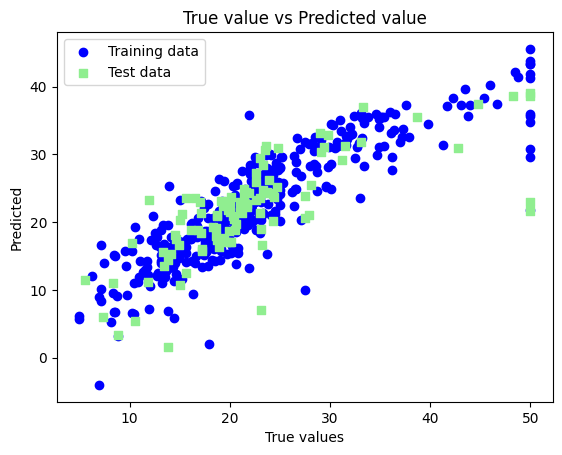

In [ ]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=1000)
plt.plot()
plt.show()